In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import matrix_rank
from scipy.optimize import linprog # for LP
import datetime
import math
from scipy.sparse import rand
from scipy.optimize import lsq_linear
from IPython.display import display, Latex # for output compilation
#specify that all columns should be shown
pd.set_option('display.max_rows', None)

$$ \left\{\begin{matrix} 
a_{11} x_1 + a_{12} x_2 + ... +a_{n1} x_n = b_1\\ 
a_{21} x_1 + a_{22} x_2 + ... +a_{21} x_n = b_2\\ 
...\\
a_{m1} x_1 + a_{m2} x_2 + ... +a_{m1} x_n = b_m\\
\end{matrix}\right .$$



$$ A = \begin{bmatrix}a_{11} & \cdots & a_{1n} \\ \vdots & \ddots & \vdots \\ a_{m1} & \cdots & a_{mn}\end{bmatrix}, \ x = \begin{bmatrix}x_1 \\ \vdots \\ x_n\end{bmatrix}, \ B =\begin{bmatrix}b_1 \\ \vdots \\ b_n\end{bmatrix} $$

$$ Ax = b $$

$$LL < x_j < UL$$

$$x = \alpha x + \beta $$
$$x^{(k+1)} = \alpha x^{(k)} + \beta $$
$$x^{(k+1)} = \alpha x^{(k)} + \beta $$
$$ \left \| x^{(k+1)} - x^{(k)} \right \|< \varepsilon \rightarrow min$$

### Read initial data

In [2]:
path_to_preprocessed = 'Data/Schöpfleuthnergasse/Preprocessed data/' #write path to the you own folder

In [3]:
A_df = pd.read_csv(path_to_preprocessed + 'new_A_matrix_only_concrete.csv')
b_df = pd.read_csv(path_to_preprocessed + 'new_b_vector_only_concrete.csv')
months_df = pd.read_csv(path_to_preprocessed + 'new_month_labels_only_concrete.csv')
labels_df = pd.read_csv(path_to_preprocessed + 'new_types_labels_only_concrete.csv')

In [4]:
b = np.array(b_df.betrag, dtype = float)
A = np.array(A_df, dtype = float, order='C')

### Constraints

In [5]:
## We can define constrains for prices( can be taken from supplier/fin.report???)
lb = [10,10,10,10,10,10,10,10,10,10,10,10,10]
ub = [250,220,150,50,220,220,100,220,220,230,220,220,220]

### Solution

In [6]:
res = lsq_linear(A, b, bounds=(lb, ub), lsmr_tol='auto', method = 'trf', verbose=2)
res

   Iteration        Cost      Cost reduction    Step norm     Optimality   
       0         1.3431e+10                                    1.94e+10    
       1         2.6816e+09      1.07e+10       2.22e+02       4.48e+09    
       2         1.0989e+09      1.58e+09       9.31e+01       9.60e+08    
       3         7.6315e+08      3.36e+08       2.13e+02       2.94e+08    
       4         7.0320e+08      6.00e+07       2.98e+01       5.98e+07    
       5         6.5927e+08      4.39e+07       3.15e+01       1.45e+07    
       6         6.4631e+08      1.30e+07       1.10e+01       3.47e+05    
       7         6.4605e+08      2.63e+05       2.15e-01       1.96e+03    
       8         6.4605e+08      1.46e+03       1.19e-03       9.79e+00    
       9         6.4605e+08      7.35e+00       6.00e-06       3.23e-06    
      10         6.4605e+08      1.06e-07       1.05e-13       5.70e-07    
The relative change of the cost function is less than `tol`.
Number of iterations 11, in

       message: The relative change of the cost function is less than `tol`.
       success: True
        status: 2
           fun: [ 1.204e+04 -1.030e+04  7.061e+03 -7.421e+03  7.467e+03
                 -1.770e+04  6.763e+03  9.213e+03 -2.020e+04  7.779e+02
                 -5.272e+03]
             x: [ 1.000e+01  8.214e+01 ...  2.200e+02  1.000e+01]
           nit: 11
          cost: 646046882.744494
    optimality: 5.697992679171739e-07
   active_mask: [-1  0 ...  1 -1]
 unbounded_sol: (array([ 3.661e+03, -1.530e+03, ...,  1.274e+03, -3.024e+02]), array([], dtype=float64), 11, array([ 1.129e+03,  7.418e+02,  2.629e+02,  1.637e+02,
                        9.340e+01,  2.428e+01,  8.874e+00,  8.235e+00,
                        2.788e+00,  1.758e+00,  1.494e-01]))

In [7]:
XXs = pd.DataFrame(res['x'], columns = ['x_i'], index = labels_df)
fun = pd.DataFrame(res['fun'], columns = ['res'])
res['active_mask']

array([-1,  0, -1,  1,  0,  0,  1,  0,  1, -1,  1,  1, -1])

### Visualization

<Axes: >

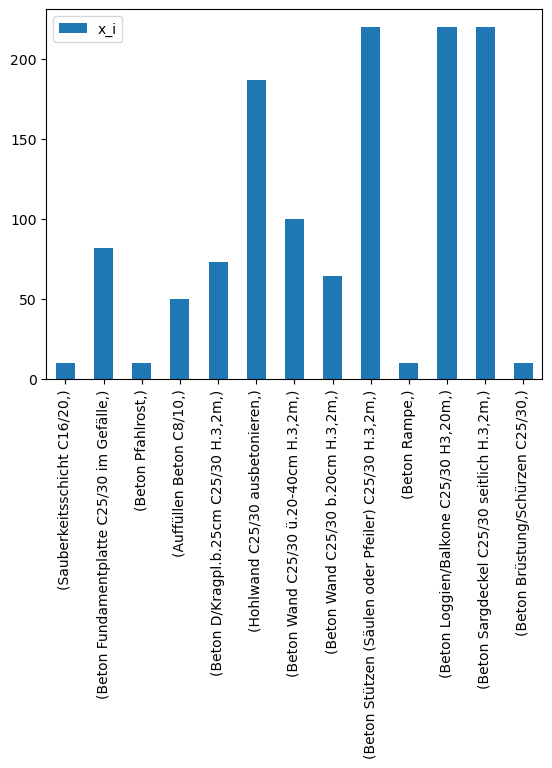

In [8]:
XXs.plot.bar()

In [9]:
str_latex = '+'.join( str(round(XXs.x_i.iloc[i],0)) +'x_{' + str(i+1) + '}' for i in range(XXs['x_i'].shape[0]))

In [10]:
display(Latex('$$f(x)=' + str_latex + '$$'))

<IPython.core.display.Latex object>